#                      1. Exercise          «Portfolio-Exam Part I»                MADS-MMS            Tom Wüsten

# Exercise 1. (Data Acquisition and Initial Data Analysis – 10 points)
 Obtain the dataset [1] from the UCI Machine Learning Repository.
Conduct a brief initial analysis of the raw dataset (henceforth called Dataset 𝐴).

Import libaries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Import data

In [38]:
df = pd.read_csv('Live_20210128.csv', sep = ",")
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Preprocessing data
1. Check if nan values in data
-   Result: columns1-4 have na Values
2. Check for columns1-4 if all values are na
-   all values in Columns1-4 are nan values
-   so we can drop this 4 columns 

In [39]:
nan_values_columns = df.isna().any()
print (nan_values_columns)
result_na_columns = df[:-4].isna().any()
print(result_na_columns)
df.drop(columns=df.columns[-4:],axis=1,inplace=True)
df.head()

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool
status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool


1.1 (2 points) What do the rows of the dataset represent?

In [41]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Every row represent a post. This post can be a video or an image. Every post got a various attributes like status_published, num_reactions or num_comments

1.2 (2 points) How many different instances does the dataset contain?

The dataset contains 7050 instances.

In [51]:
unique_instances = df['status_id'].unique()
number_of_rows = unique_instances.shape[0]
print('Number of Rows : ', number_of_rows)

Number of Rows :  7050


1.3 (2 points) How many attributes (columns) are in the dataset?

The dataset contains 12 attributes

In [53]:
number_of_columns = df.shape[1]
print('Number of Columns : ', number_of_columns)

Number of Columns :  12


1.4 (4 points) What is the standard deviation of the feature num_likes?

The Standard deviation of the feature num likes is 449.472

In [55]:
sd_num_likes = df['num_likes'].std()
print('The Standard deviation of the feature num likes is:',sd_num_likes )

The Standard deviation of the feature num likes is: 449.47235705614156


# Exercise 2. (k-Means Clustering on the Plain Data – 40 points)
Begin the analysis using the k-means approach.

2.1 (5 points) Which features of the dataset do not suggest themselves as features analysis? For each of these features, brieﬂy state why you exclude them.

The status_id has no value because it's an id and every instances has a different id. The status_type 
The status_published has no value because time of the post is not important
The first three columns status_id, status_type and status_published aren't interesting in the feature analysis.

2. (15 points) For the next tasks, restrict Dataset 𝐴 to the following features: num_reactions,
num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas.
We will call this Dataset 𝐵.
On 𝐵, compute k-means clusterings of the dataset using different choices for 𝑘 : 2, 3, . . . , 10.
Use a seed of 1 to make the experiments reproducible. For each 𝑘 compute the silhouette
coefﬁcient and plot it against 𝑘 in a diagram. Interpret the diagram!

Create Dataset B as df_b

In [65]:
df_b = df.iloc[:,3:10]
df_b

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,529,512,262,432,92,3,1
1,150,0,0,150,0,0,0
2,227,236,57,204,21,1,1
3,111,0,0,111,0,0,0
4,213,0,0,204,9,0,0
...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0
7046,16,0,0,14,1,0,1
7047,2,0,0,1,1,0,0
7048,351,12,22,349,2,0,0


Function to calclulate the silhouette score

In [110]:
def calculate_silhouette_score(k_min,k_max,df):
    silhouettes=[]
    for k_min in range(k_min,k_max+1):   
        kmeans=KMeans(n_clusters=k_min, random_state=1) # <- by default, this runs k-means++, starting over 10 times, reporting the best result
        y_pred = kmeans.fit_predict(df)
        silhouettes.append(silhouette_score(df,y_pred))
    return kmeans,silhouettes

function for plotting the silhouette score against k

In [106]:
def plot_silhouette_score(k_min,k_max,silhouette):
    plt.xlabel('k')
    plt.ylabel('Silhouette Coefﬁcient')
    plt.plot(range(k_min,k_max+1), silhouette)
    return plt.show()

In [104]:
def plot_silhouette_score2(k_min,k_max,silhouette):   
    return plt.plot(range(k_min,k_max+1), silhouette)

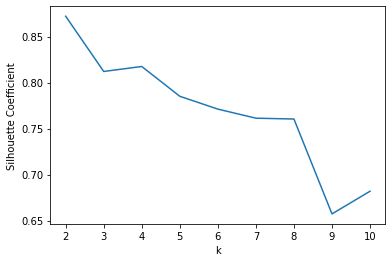

In [107]:
k_min = 2
k_max = 10
kmeans,silhouette = calculate_silhouette_score(k_min,k_max,df_b)
plot_silhouette_score(k_min,k_max,silhouette)

## Observations
1. We might have expected k=4 to yield the best results, because the dataset has 4 different kinds of status_types
2. We see that k=2 has the highest silhouette coefficient, but also k=3 & k=4 have a high silhouette coefficient
3. We also see that the silhouette coefficient till k= 8 is above 0.7. The lecture we defined that sc > 0.7 means that we have a strong structure

2.3 (10 points) Create a silhouette plot for the 𝑘 with the highest silhouette coefﬁcient in the
previous experiment. Interpret the diagram!

In [111]:
def visualize_silhouette_score(kmeans,color,X):
    visualizer = SilhouetteVisualizer(kmeans, colors=color, is_fitted=True)
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.finalize()
    print(f'Silhoutte score: {visualizer.silhouette_score_}')
    return visualizer.show()        # Finalize and render the figure

C:\Users\wuest\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Silhoutte score: 0.8721940910132095


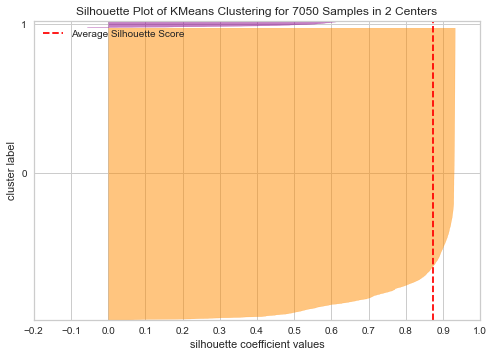

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7050 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [114]:
colors=['darkorange', 'darkmagenta']
kmeans,silhouette = calculate_silhouette_score(2,2,df_b)
visualize_silhouette_score(kmeans,colors,df_b)

2.4. (10 points) For the same 𝑘, create a plot of the data where you use only the two features
num_reactions and num_likes as the axes. Use color to distinguish instances from
different clusters. Also highlight the cluster centroids of the k-means clustering. Interpret the
diagram, considering only the above two features. Is there a clear clustering structure visible?

Slice data into two columns

In [119]:
df_b2 = df_b[["num_reactions", "num_likes"]]
df_b2.head() 

,num_reactions,num_likes
0,529,432
1,150,150
2,227,204
3,111,111
4,213,204


In [141]:
def plot_clusters_with_centers(kmeans, X):
    plt.figure(figsize=(8, 8))
    y_pred = kmeans.fit_predict(X)
    for i in range(0,len(np.unique(y_pred))):
        plt.scatter(X.iloc[y_pred==i, 0], X.iloc[y_pred==i, 1], c=colors[i], label=i)

    plt.xlabel("Num_reactions")
    plt.ylabel("Num_likes")
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1],
        s=350, marker='*', c='crimson', edgecolor='black'
      

    )

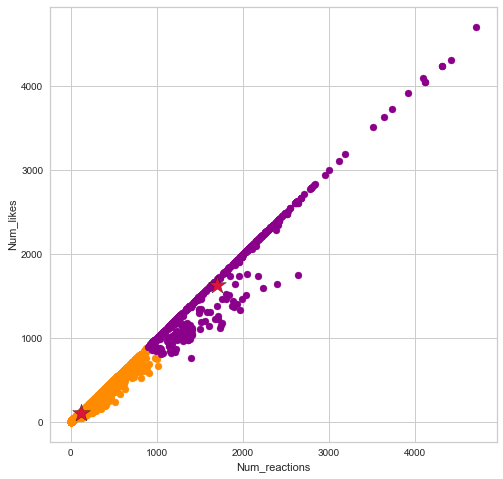

In [142]:
colors=['darkorange', 'darkmagenta']
kmeans,silhouette = calculate_silhouette_score(2,2,df_b2)
plot_clusters_with_centers(kmeans, df_b2)
#kmeans

## Observations
1. We see that the number of Likes is growing linear with the number of reactions.
2. Regards to Facebook post that makes total sense, because if a post has more likes in genral more people see that post and react to this
3. The clustering structure is not clear visible.


# Exercise 3. (Scaling and Feature Selection – 50 points)
In these next experiments, we preprocess and restrict Dataset 𝐵 further through scaling and using variance as a criterion for feature selection. Particularly, use the class
sklearn.feature_selection.VarianceThreshold.

3.1 (10 points) Describe in your own words, what the class VarianceThreshold is used for and
explain why looking at a feature’s variance is meaningful.

test